In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('dataset_distill.csv', sep = ';')
# df.head(2)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv ('/kaggle/input/distillation-column/dataset_distill.csv', sep=';')
df.head(2)


/kaggle/input/distillation-column/dataset_distill.csv


,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
0,1.01,350.89,350.95,351.01,351.08,351.16,351.26,351.38,351.54,351.78,...,353.00,355.19,363.77,371.47,780,1040,260,340,600,0.82076
1,1.01,350.86,350.91,350.96,351.02,351.09,351.17,351.28,351.43,351.66,...,352.76,354.66,362.20,370.98,780,1040,260,340,600,0.83253


In [3]:
df.shape

(4408, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null   float64
 15  L   

In [5]:
df["L"].value_counts()

780         1102
450          586
130          586
1050         516
1040         516
22500        293
75           293
1,23E+08     258
1400         258
Name: L, dtype: int64

In [6]:
# ## Convert Datatype (object) to (int)
# df["L"] = df["L"].astype(int )
# df["V"] = df["V"].astype(int)

In [7]:

## handling (1,23E+08 ) value in (L , V)
df['L'] = df['L'].apply(lambda x: int (float(x.split()[0].replace(',', ''))))
df['V'] = df['V'].apply(lambda x: int (float (x.split()[0].replace(',', ''))))



In [8]:
df["L"].value_counts()


780            1102
450             586
130             586
1050            516
1040            516
22500           293
75              293
12300000000     258
1400            258
Name: L, dtype: int64

In [9]:
df.info()
## all features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null   float64
 15  L   

In [10]:
df.isnull().sum()

Pressure                 0
T1                       0
T2                       0
T3                       0
T4                       0
T5                       0
T6                       0
T7                       0
T8                       0
T9                       0
T10                      0
T11                      0
T12                      0
T13                      0
T14                      0
L                        0
V                        0
D                        0
B                        0
F                        0
Ethanol concentration    0
dtype: int64

In [11]:
df.describe()

,Pressure,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T11,T12,T13,T14,L,V,D,B,F,Ethanol concentration
count,4408.00,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,...,4408.000000,4408.000000,4408.000000,4408.000000,4.408000e+03,4.408000e+03,4408.000000,4408.000000,4408.000000,4408.000000
mean,1.01,351.029049,351.409363,352.066202,352.828578,353.910204,355.214270,356.453975,357.539902,358.484004,...,360.048650,360.884025,364.367117,367.717250,7.199204e+08,7.199186e+09,251.823956,293.411978,545.235935,0.792205
std,0.00,0.334105,1.125225,2.671189,3.788418,4.986453,6.251028,7.119853,7.620257,7.882159,...,7.899189,7.604026,8.563034,6.639423,2.887664e+09,2.887664e+10,71.048000,108.550994,119.192840,0.076441
min,1.01,350.760000,350.770000,350.770000,350.790000,350.800000,350.820000,350.860000,350.910000,351.000000,...,351.500000,352.430000,353.150000,354.520000,7.500000e+01,2.250000e+02,150.000000,90.000000,350.000000,0.538190
25%,1.01,350.820000,350.860000,350.900000,350.950000,351.000000,351.070000,351.160000,351.280000,351.440000,...,352.220000,353.320000,354.750000,362.920000,4.500000e+02,6.000000e+02,150.000000,200.000000,350.000000,0.761890
50%,1.01,350.900000,350.990000,351.100000,351.260000,351.475000,351.840000,352.370000,352.930000,353.740000,...,356.785000,361.470000,370.745000,372.810000,7.800000e+02,1.040000e+03,260.000000,320.000000,600.000000,0.817520
75%,1.01,351.080000,351.390000,351.822500,352.410000,353.740000,356.867500,361.640000,364.750000,366.880000,...,367.522500,367.910000,372.440000,373.010000,1.050000e+03,1.400000e+03,260.000000,352.500000,600.000000,0.850280
max,1.01,352.320000,356.030000,364.970000,368.600000,369.060000,372.570000,372.970000,373.010000,373.010000,...,373.010000,373.010000,373.060000,373.070000,1.230000e+10,1.230000e+11,350.000000,450.000000,650.000000,0.891760


<AxesSubplot:xlabel='Ethanol concentration', ylabel='Count'>

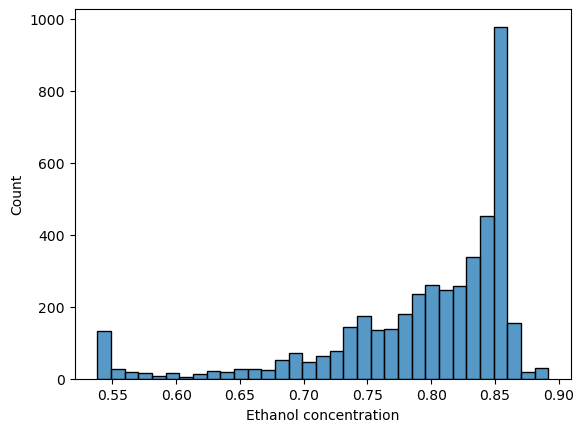

In [12]:
sns.histplot(df['Ethanol concentration'])

<AxesSubplot:>

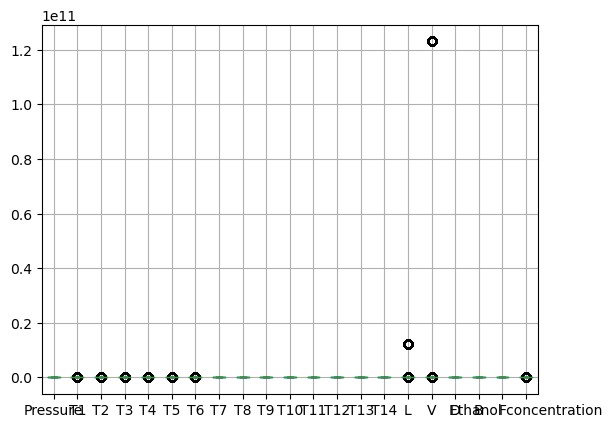

In [13]:
#Creating subplot of each column with its own scale
df.boxplot()

<AxesSubplot:>

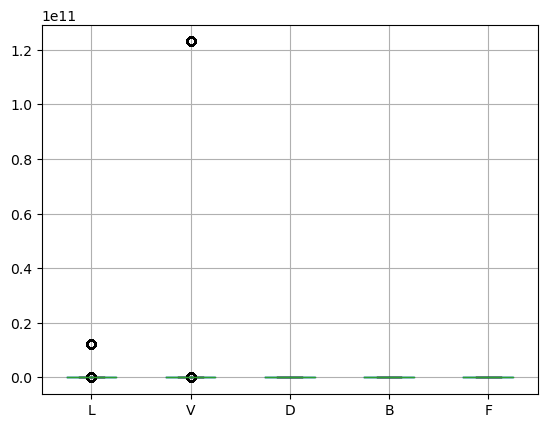

In [14]:
#Creating subplot of each column with its own scale
df[['L','V','D','B','F']].boxplot()

In [15]:
##splitting data before Scaling to avoid Data leakage
from sklearn.model_selection import train_test_split

X = df.drop('Ethanol concentration' , axis=1)
y = df[['Ethanol concentration']]
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=42)

###Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

_columns =  X_train.columns
X_train = MinMaxScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = _columns)

<AxesSubplot:>

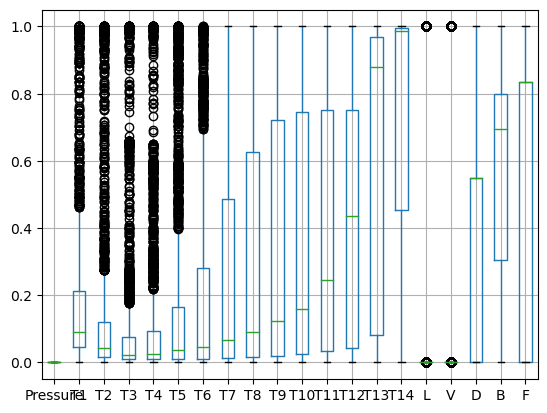

In [17]:
X_train.boxplot()

###Handle Outliers

In [18]:
def Replace_outliers_Mean (_df , feature):
  Q1 = _df[feature].quantile(0.25)
  Q3 = _df[feature].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  _df[feature] =np.where(_df[feature]>upper_whisker,_df[feature].mean(),np.where(_df[feature]<lower_whisker,_df[feature].mean(),_df[feature]))



Replace_outliers_Mean(X_train, 'T1')
Replace_outliers_Mean(X_train, 'T2')
Replace_outliers_Mean(X_train, 'T3')
Replace_outliers_Mean(X_train, 'T4')
Replace_outliers_Mean(X_train, 'T5')
Replace_outliers_Mean(X_train, 'T6')
Replace_outliers_Mean(X_train, 'L')
Replace_outliers_Mean(X_train, 'V')




<AxesSubplot:>

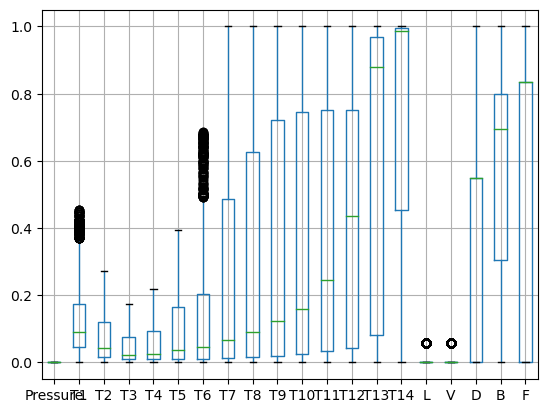

In [19]:
X_train.boxplot()

###Modeling

In [20]:
## LinearRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression()
LR_mae = cross_val_score(LR,X_train,y_train.values.ravel(), cv=3, scoring ='neg_mean_absolute_error')

print('Mean Absolute Error: ' + str(LR_mae.mean()*-1))

Mean Absolute Error: 0.02398502995561534


In [21]:
## SVR
from sklearn.svm import SVR
svr = SVR (kernel='poly', gamma=0.001,C= 0.1)

svr_mae = cross_val_score(svr,X_train,y_train.values.ravel(), cv=3, scoring ='neg_mean_absolute_error')

print('svr_tuned_mae_avg: ' + str(svr_mae.mean()*-1))

svr_tuned_mae_avg: 0.07215517180902574


###Output

In [22]:
svr.fit(X_train , y_train)
y_pred= svr.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.3283954392784218e+20

In [24]:
my_submission = pd.DataFrame({ 'Ethanol concentration': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('/kaggle/working/Output.csv', index=False)
